In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [3]:
from TileEM_plot_toolbox import *
from qualityBaseline import *

In [4]:
my_BBG  = pd.read_csv("my_ground_truth.csv")
object_lst = list(object_tbl.id)
objid=12
ground_truth_match = my_BBG[my_BBG.object_id==objid]
x_locs,y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])
BBG = shapely.geometry.Polygon(zip(x_locs,y_locs))

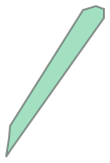

In [5]:
BBG

In [6]:
def precision(obj_x_locs,obj_y_locs):
    worker_bb = Polygon(zip(obj_x_locs[0],obj_y_locs[0]))
    worker_bb_area  = worker_bb.area

# Summarization-Based Method 

In [41]:
# Creating 2 empty precision recall table containing P,R for each metric used 
cols = [u'Num Points',u'Area Ratio',u'Jaccard [Self]', u'Precision [Self]', u'Recall [Self]']
index = list(set(df.object_id))

precision_df = pd.DataFrame(index=index,columns=cols)
recall_df = pd.DataFrame(index=index,columns=cols)

In [49]:
from collections import OrderedDict
df = pd.read_csv("../computed_my_COCO_BBvals.csv",index_col=0)
df_noBBG = df[~(df["worker_id"].isin([1,2,3]))] #Filter our ground truth workers
#attr="Jaccard [Self]"# select best BB based on the worker with the highest scoring  atttr metric

for attr in cols: 
    idx = df_noBBG.groupby("object_id")[attr].transform(max) == df_noBBG[attr]
    best_BBs = df_noBBG[idx] #best BBs based on these metrics
    best_BBs_recall = list(best_BBs["Recall [Self]"])
    best_BBs_precision =  list(best_BBs["Precision [Self]"])
    try:
        #add it to the large table 
        precision_df[attr] = best_BBs_precision
        recall_df[attr] = best_BBs_recall
    except(ValueError):
        print attr
        print len(best_BBs_recall)
        print len(best_BBs_precision)

Num Points
53
53
Precision [Self]
64
64
Recall [Self]
70
70


In [50]:
precision_df

,Num Points,Area Ratio,Jaccard [Self],Precision [Self],Recall [Self]
1,NaN,0.754620,0.975932,NaN,NaN
2,NaN,0.000000,0.955878,NaN,NaN
3,NaN,0.000000,0.926036,NaN,NaN
4,NaN,0.721348,0.936799,NaN,NaN
5,NaN,0.696978,0.970107,NaN,NaN
6,NaN,0.856261,0.941545,NaN,NaN
7,NaN,0.584433,0.976273,NaN,NaN
8,NaN,0.653773,0.927926,NaN,NaN
9,NaN,0.941104,0.977930,NaN,NaN
10,NaN,0.228644,0.906796,NaN,NaN


In [46]:
# for bb in tqdm(list(best_BBs.iterrows())):
#     objid = bb[1]["object_id"]
#     ground_truth_match = my_BBG[my_BBG.object_id==objid]
#     x_locs,y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])

#     bbx_path= bb[1]["x_locs"]
#     bby_path= bb[1]["y_locs"]
#     worker_x_locs,worker_y_locs= process_raw_locs([bbx_path,bby_path])
#     worker_x_locs,worker_y_locs = zip(*list(OrderedDict.fromkeys(zip(worker_x_locs,worker_y_locs))))
    
# #     p_lst.append(precision([worker_x_locs,x_locs],[worker_y_locs,y_locs]))
# #     r_lst.append(recall([worker_x_locs,x_locs],[worker_y_locs,y_locs]))

In [19]:
# best_BBs["Precision"] = p_lst
# best_BBs["Recall"] = r_lst

In [20]:
# best_BBs["Precision [Self]"][best_BBs["Precision [Self]"]>1]=1
# best_BBs["Recall [Self]"][best_BBs["Recall [Self]"]>1]=1

In [21]:
precision_tbl = []

In [22]:
best_BBs_recall = list(best_BBs["Recall [Self]"])
best_BBs_precision =  list(best_BBs["Precision [Self]"])

In [23]:
len(list(set(df.object_id)))

47

In [24]:
len(best_BBs_recall)

47

In [39]:
precision_df[attr] = best_BBs_precision
recall_df[attr] = best_BBs_recall